# Homework 3 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (30 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Handle the missing values in the datasets. Briefly explain. **-5 points**

In [171]:
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [172]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Decision Tree Classifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier, plot_tree

# One-hot encoding for categorical data
from sklearn.preprocessing import OneHotEncoder

# Load the Titanic dataset (train and test)
# Defining file paths for the train and test datasets
train_path = '/Users/hasanmustafabayli/Desktop/CS506/Homeworks/homework-3-hasanmustafabayli/train.csv'
test_path = '/Users/hasanmustafabayli/Desktop/CS506/Homeworks/homework-3-hasanmustafabayli/test.csv'

# Reading the datasets into pandas dataframes
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Data preprocessing steps
# Filling missing 'Age' values with mean age of corresponding 'Sex'
mean = train_df.groupby('Sex')['Age'].mean()
train_df['Age'] = train_df.apply(lambda row: mean[row['Sex']] if pd.isna(row['Age']) else row['Age'], axis=1)

# Handling missing 'Cabin' data by labeling them as 'Unknown'
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')

# Filling missing 'Embarked' values with the most common embarkation point
common = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(common)




b) Add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

In [173]:
import pandas as pd

def extract_title(df):
    """Extracts title from the 'Name' column."""
    df['newname'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    return df

def calculate_fare_per_person(df):
    """Calculates fare per person by dividing 'Fare' by the sum of 'SibSp', 'Parch', and 1."""
    df['fpr'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)
    return df


train_df = extract_title(train_df)
train_df = calculate_fare_per_person(train_df)





c) Split the dataset into training and testing. Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain with a plot presenting in x-axis the `max_depth` and in y-axis the accuracy (both training and testing). **- 10 points**

In [174]:
import pandas as pd

def preprocess_data(df):
    """
    Applies all preprocessing steps to the DataFrame.
    Includes dropping unnecessary columns, encoding sex and cabin presence,
    standardizing titles, and applying one-hot encoding to a new column.
    """
    df = drop_columns(df, ['Name', 'Ticket', 'PassengerId', 'Embarked'])
    df = encode_sex(df)
    df = encode_cabin_presence(df)
    df = standardize_titles(df)
    df = apply_one_hot_encoding(df, 'newname')
    return df

def drop_columns(df, columns):
    """
    Drops specified columns from the DataFrame.
    Parameters:
        df: DataFrame from which the columns are to be dropped.
        columns: List of column names to be dropped.
    """
    return df.drop(columns, axis=1)

def encode_sex(df):
    """
    Encodes the 'Sex' column: converts 'male' to 0 and 'female' to 1.
    Parameters:
        df: DataFrame with the 'Sex' column.
    """
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    return df

def encode_cabin_presence(df):
    """
    Encodes the 'Cabin' column based on whether cabin information is present.
    Assigns 1 if cabin info is present, 0 otherwise.
    Parameters:
        df: DataFrame with the 'Cabin' column.
    """
    df['Cabin'] = df['Cabin'].notna().astype(int)
    return df

def standardize_titles(df):
    """
    Standardizes titles in the 'newname' column.
    It replaces rare titles with 'Rare' and standardizes some common variations.
    Parameters:
        df: DataFrame with the 'newname' column.
    """
    rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    title_mappings = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'}
    df['newname'] = df['newname'].replace(rare_titles, 'Rare').replace(title_mappings)
    return df

def apply_one_hot_encoding(df, column):
    """
    Applies one-hot encoding to a specified column.
    Parameters:
        df: DataFrame to be transformed.
        column: The column on which one-hot encoding is to be applied.
    """
    return pd.get_dummies(df, columns=[column])

train_df = preprocess_data(train_df)


train_df.head()




,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,fpr,newname_Master,newname_Miss,newname_Mr,newname_Mrs,newname_Rare
0,0,3,0,22.0,1,0,7.2500,1,3.62500,0,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,1,35.64165,0,0,0,1,0
2,1,3,1,26.0,0,0,7.9250,1,7.92500,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,1,26.55000,0,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,1,8.05000,0,0,1,0,0


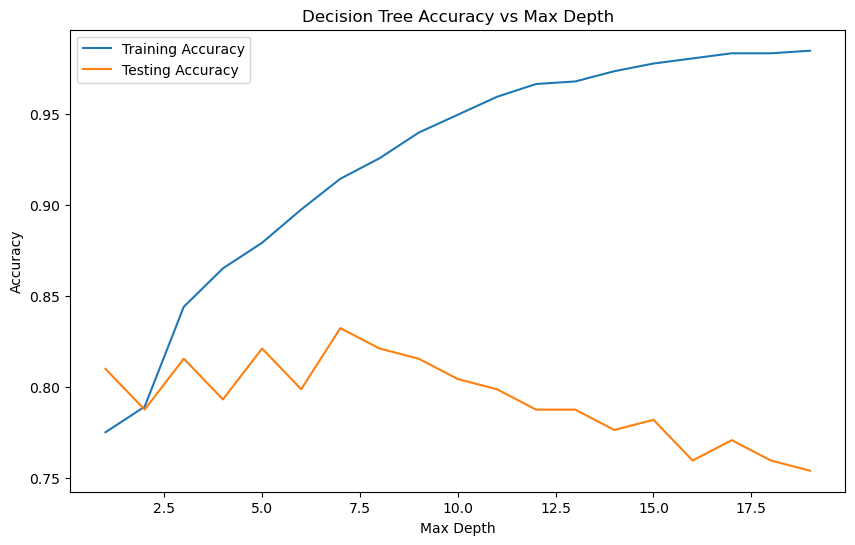

In [179]:
newval = train_df.drop('Survived', axis=1)
newvaly = train_df['Survived']

features_train, features_test, target_train, target_test = train_test_split(newval, newvaly, test_size=0.2)
train_acc = []
test_acc = []

for depth in range(1, 20):  
    temp = DecisionTreeClassifier(max_depth=depth)
    temp.fit(features_train, target_train)
    
    y_train_pred = temp.predict(features_train)
    train_accuracy = accuracy_score(target_train, y_train_pred)
    train_acc.append(train_accuracy)
    
    y_test_pred = temp.predict(features_test)
    test_accuracy = accuracy_score(target_test, y_test_pred)
    test_acc.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_acc, label='Training Accuracy')
plt.plot(range(1, 20), test_acc, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()



d) Plot the decision tree. Briefly explains how it works. **- 5 points**

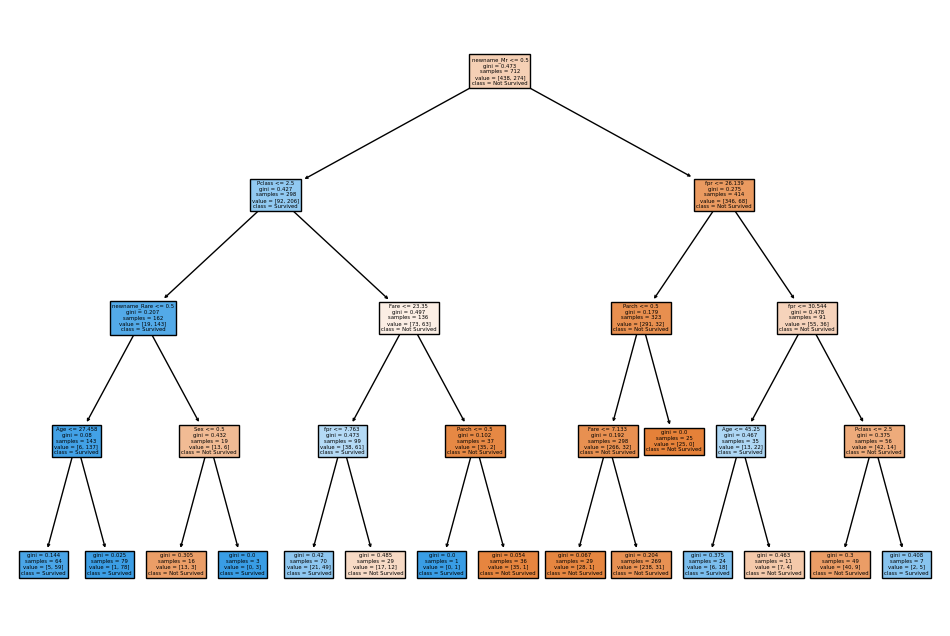

In [180]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

def train_decision_tree_classifier(features_train, target_train, max_depth, random_state):
    """
    Trains a Decision Tree Classifier on the provided training data.
    
    Parameters:
        features_train: DataFrame containing the training features.
        target_train: Series containing the training target values.
        max_depth: The maximum depth of the tree.
        random_state: A seed value for random number generation to ensure reproducibility.

    Returns:
        A trained Decision Tree Classifier.
    """
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    classifier.fit(features_train, target_train)
    return classifier

def plot_decision_tree(classifier, feature_names, class_names):
    """
    Plots the decision tree of the provided classifier.
    
    Parameters:
        classifier: The trained Decision Tree Classifier.
        feature_names: List of feature names for the decision tree.
        class_names: List of class names for the decision tree.

    Returns:
        None. This function directly plots the decision tree.
    """
    plt.figure(figsize=(12, 8)) 
    plot_tree(classifier, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()


trained_classifier = train_decision_tree_classifier(features_train, target_train, max_depth=4, random_state=42)
plot_decision_tree(trained_classifier, features_train.columns, ['Not Survived', 'Survived'])



e) Plot the confusion matrix of the above classifier. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 5 points**

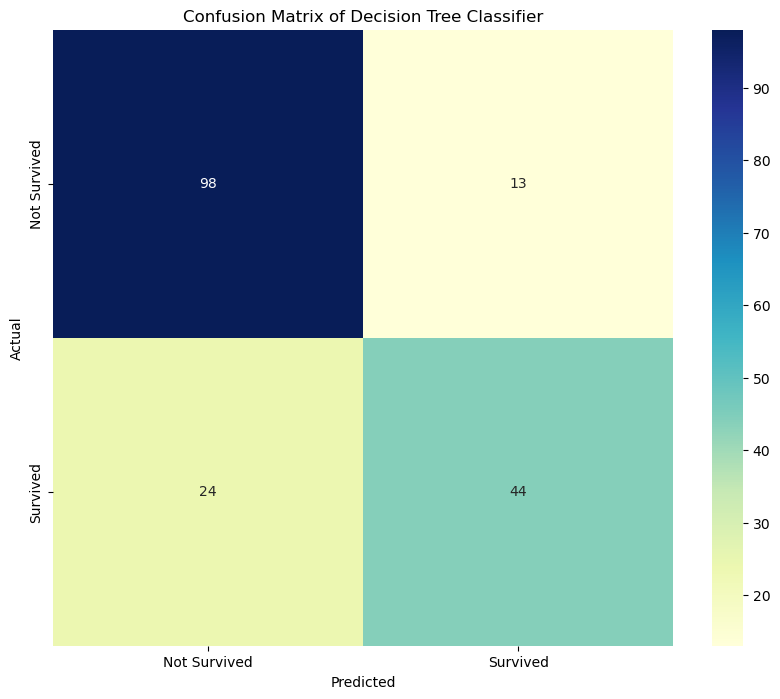

In [181]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def predict_with_classifier(classifier, features):
    """
    Generates predictions using the provided classifier and test features.
    
    Parameters:
        classifier: A trained classifier.
        features: Test features to make predictions on.

    Returns:
        Predictions made by the classifier.
    """
    return classifier.predict(features)

def plot_confusion_matrix(true_labels, predictions, class_labels):
    """
    Plots a confusion matrix using the actual and predicted labels.
    
    Parameters:
        true_labels: The actual labels.
        predictions: The predicted labels by the classifier.
        class_labels: List of class labels for the confusion matrix.

    Returns:
        None. This function directly plots the confusion matrix.
    """
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8)) 
    sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels) 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix of Decision Tree Classifier')
    plt.show()

val_predictions = predict_with_classifier(trained_classifier, features_test)
plot_confusion_matrix(target_test, val_predictions, ['Not Survived', 'Survived'])




The confusion matrix of the decision tree classifier shows that it predicted 'Not Survived' more accurately than 'Survived', with 98 true negatives and 44 true positives. Misclassifications occurred with 13 false positives and 24 false negatives, indicating potential flaws in the model's decision rules or data features. To improve accuracy, a detailed analysis of misclassified instances through the decision tree is necessary to pinpoint and address the underlying causes of these errors.

# Exercise 2 (30pts)

Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

In this task, you are asked to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs.

**Note**: Your cannot use the random forests model from sklearn or any other library, but you can use any library that implements an individual decision tree.

a) Construct a Random Forest Classifier using the template below. Use it on the training set you defined earlier with an arbitrary number of trees and tree depth and evaluate it on the test set you defined earlier. **-- 10pts**

In [192]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode

class ForestClassifier:
    def __init__(self, trees_number, depth_limit, split_method):
        # Initialize the forest classifier with hyperparameters
        self.depth_limit = depth_limit
        self.trees_number = trees_number
        self.split_method = split_method
        
        # Create a list to hold individual decision tree classifiers
        self.trees_list = [DecisionTreeClassifier(max_depth=self.depth_limit, criterion=self.split_method) for _ in range(trees_number)]

    def _bootstrap_data(self, feature_set, target_set):
        # Generate a bootstrap sample (with replacement) from the data
        sample_count = feature_set.shape[0]
        sample_indices = np.random.choice(sample_count, size=sample_count, replace=True)
        return feature_set.iloc[sample_indices], target_set.iloc[sample_indices]

    def train_model(self, feature_set, target_set):
        # Train each decision tree in the forest on a bootstrapped dataset
        for decision_tree in self.trees_list:
            sample_features, sample_targets = self._bootstrap_data(feature_set, target_set)
            decision_tree.fit(sample_features, sample_targets)

    def make_predictions(self, test_features):
        # Make predictions using all decision trees in the forest
        tree_outputs = []
        for decision_tree in self.trees_list:
            tree_outputs.append(decision_tree.predict(test_features))
        
        # Compute the mode (most common prediction) across all trees
        tree_outputs = np.array(tree_outputs)
        consensus_result = mode(tree_outputs, axis=0).mode
        
        # Flatten the consensus result to get the final predictions
        return consensus_result.flatten()


b) Experiment with

 - different max depths = 5,10,15
 - different number of trees [10,50,100,500,1000]
 - different information criteria ['gini index', 'entropy'] 

Report the accuracy of your best and worst models, and compare them with the accuracy of the decision tree from **1c**. What observations did you make on Random Forests as a whole? **-- 15pts**

In [193]:
# Define the list of hyperparameter choices for tuning
depth_choices = [5, 10, 15]
trees_count_options = [10, 50, 100, 500, 1000]
splitting_rules = ['gini', 'entropy']

# Initialize variables to track the highest and lowest accuracies and their corresponding parameters
highest_accuracy = 0
lowest_accuracy = 1
optimal_parameters = None
suboptimal_parameters = None

# Initialize index variables for looping through the hyperparameter choices
depth_index = 0
trees_count_index = 0
split_rule_index = 0

# Outer loop: Iterate through different depth choices
while depth_index < len(depth_choices):
    # Middle loop: Iterate through different tree count options
    while trees_count_index < len(trees_count_options):
        # Inner loop: Iterate through different splitting rules
        while split_rule_index < len(splitting_rules):
            # Get the current hyperparameters based on the indices
            depth = depth_choices[depth_index]
            trees_count = trees_count_options[trees_count_index]
            split_rule = splitting_rules[split_rule_index]

            # Create a forest model with the current hyperparameters
            forest_model = ForestClassifier(trees_count, depth, split_rule)
            
            # Train the forest model on the training data
            forest_model.train_model(features_train, target_train)
            
            # Make predictions on the test data using the trained model
            predicted_labels = forest_model.make_predictions(features_test)
            
            # Calculate the accuracy of the model's predictions
            model_accuracy = accuracy_score(target_test, predicted_labels)
            
            # Update the optimal and suboptimal model parameters and accuracies
            if model_accuracy > highest_accuracy:
                highest_accuracy = model_accuracy
                optimal_parameters = (depth, trees_count, split_rule)
            if model_accuracy < lowest_accuracy:
                lowest_accuracy = model_accuracy
                suboptimal_parameters = (depth, trees_count, split_rule)

            # Increment the split_rule_index to move to the next splitting rule
            split_rule_index += 1
        
        # Increment the trees_count_index to move to the next tree count option
        trees_count_index += 1
        
        # Reset the split_rule_index for the next iteration of tree count
        split_rule_index = 0
    
    # Increment the depth_index to move to the next depth choice
    depth_index += 1
    
    # Reset the trees_count_index for the next iteration of depth choice
    trees_count_index = 0

# Print the results of parameter tuning and model evaluation
print(f"Optimal Model - Accuracy: {highest_accuracy}, Parameters: {optimal_parameters}")
print(f"Suboptimal Model - Accuracy: {lowest_accuracy}, Parameters: {suboptimal_parameters}")




/var/folders/k3/rp_32fr55nd3glzl6jw2bpnw0000gn/T/ipykernel_1227/2471303796.py:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  consensus_result = mode(tree_outputs, axis=0).mode
/var/folders/k3/rp_32fr55nd3glzl6jw2bpnw0000gn/T/ipykernel_1227/2471303796.py:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Optimal Model - Accuracy: 0.8268156424581006, Parameters: (10, 100, 'entropy')
Suboptimal Model - Accuracy: 0.7821229050279329, Parameters: (5, 10, 'gini')


/var/folders/k3/rp_32fr55nd3glzl6jw2bpnw0000gn/T/ipykernel_1227/2471303796.py:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  consensus_result = mode(tree_outputs, axis=0).mode


c)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$C_{i} = \text{Count of elements belonging to class 'i'}$
$C = \text{Total Number of Elements}$

Consider we have a total of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column. **--5pts**

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below.

In [ ]:
def calculate_entropy(pos, neg):
    total = pos + neg
    if total == 0 or pos == 0 or neg == 0:
        return 0
    p_pos = pos / total
    p_neg = neg / total
    return -p_pos * np.log2(p_pos) - p_neg * np.log2(p_neg)

# Parent node
pos_parent = 15
neg_parent = 19

# Child nodes
pos_child1 = 9
neg_child1 = 4
pos_child2 = 6
neg_child2 = 15

entropy_parent = calculate_entropy(pos_parent, neg_parent)
entropy_child1 = calculate_entropy(pos_child1, neg_child1)
entropy_child2 = calculate_entropy(pos_child2, neg_child2)

total_samples = pos_parent + neg_parent
info_gain = entropy_parent - (entropy_child1 * (pos_child1 + neg_child1) / total_samples) \
            - (entropy_child2 * (pos_child2 + neg_child2) / total_samples)

info_gain


0.11640681324126467

![Alt text](image.png)

## Exercise 3 (40 Points)

For this question we will use Sonar dataset from sklearn.datasets, which contains sonar signals for classifying objects as either "rock" or "mine."

In [184]:
from sklearn.datasets import fetch_openml

sonar = fetch_openml(name="sonar", version=1)

X = sonar.data  # Features
y = sonar.target  # Target (rock or mine)

/Users/hasanmustafabayli/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


a) Begin by creating a training and testing datasest from the dataset, with a 80-20 ratio, and random_state=1. **1 pt**

In [194]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize a LabelEncoder to encode the target variable 'y'
label_encoder = LabelEncoder()

# Encode the target variable 'y' to convert categorical labels to numeric values
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets using train_test_split
# X: Features, y: Target variable, test_size: Fraction of data to be used for testing, random_state: Seed for randomization
X_train, X_test, y_train, y_test = train_test_split(
    X,              # Features
    y,              # Target variable
    test_size=1/5,  # Fraction of data to be used for testing (20% in this case)
    random_state=42 # Seed for randomization to ensure reproducibility
)


b) Train a KNN classifier on the training set to classify sonar signals as either "Rock" or "Mine." Use cross-validation to find an appropriate value of K. Evaluate and print the model's performance on the testing set using accuracy. **-- 9 points**

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the best K value with cross-validation
k_values = range(1, 100)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]

# Train the KNN classifier with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
accuracy_knn = knn_best.score(X_test_scaled, y_test)
print(f'Best K Value: {best_k}')
print(f'Accuracy on Testing Set: {accuracy_knn}')



Best K Value: 1
Accuracy on Testing Set: 0.9047619047619048


c) Using any combination of the classification tools we've discussed in class:

- KNN
- Naive Bayes
- SVM
- Decision Tree (including Random Forests)
- Ensemble Methods (AdaBoost, Bagging)

You may also use feature extraction tools like PCA. Train and tune a model on the training set and evaluate its performance on the test set using accuracy. **-- 30 points**

 * accuracy > .95 **-- 30 points**
 * accuracy between 0.94 and 0.95 **-- 25 points**
 * accuracy between 0.92 and 0.94 **-- 20 points**
 * accuracy between 0.9 and 0.92 **-- 15 points**
 * accuracy between 0.85 and 0.9 **-- 10 points**
 * accuracy between 0.8 and 0.85 **-- 7 points**
 * accuracy between 0.7 and 0.8 **-- 5 points**
 * accuracy < 0.7 **-- 3 points**

In [195]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Function to combine predictions from multiple classifiers
def combine_predictions(prediction_lists):
    combined_array = np.array(prediction_lists)
    sum_votes = np.sum(combined_array, axis=0)
    combined_pred = (sum_votes > (combined_array.shape[0] / 2)).astype(int)
    return combined_pred

# Standardize (normalize) the features using StandardScaler
feature_scaler = StandardScaler()
X_train_norm = feature_scaler.fit_transform(X_train)
X_test_norm = feature_scaler.transform(X_test)

# Perform PCA for dimensionality reduction while preserving 95% of the variance
pca_transformer = PCA(n_components=0.95)
X_train_transformed = pca_transformer.fit_transform(X_train_norm)
X_test_transformed = pca_transformer.transform(X_test_norm)

# Define a dictionary of classifiers with their names as keys and model instances as values
classifiers = {
    "SVM": SVC(C=5, kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Forest": RandomForestClassifier(random_state=42),
    "Boost": AdaBoostClassifier(),
    "Bayes": GaussianNB(),
    "Tree": DecisionTreeClassifier(),
    "Bag": BaggingClassifier()
}

# Train each classifier on the transformed training data and make predictions on the test data
for model_name, model in classifiers.items():
    model.fit(X_train_transformed, y_train)
    classifiers[model_name] = model.predict(X_test_transformed)

# Initialize variables to track the highest accuracy and the optimal combination of models
highest_accuracy = 0
optimal_combination = ()
optimal_predictions = []

# Iterate through different combinations of models (from 2 to all models)
for num in range(2, len(classifiers) + 1):
    for combo in combinations(classifiers.keys(), num):
        # Create a list of predictions from the selected combination of models
        ensemble_preds = [classifiers[name] for name in combo]
        # Combine the predictions using the combine_predictions function
        combined_predictions = combine_predictions(ensemble_preds)
        # Calculate the accuracy of the combined predictions
        current_accuracy = accuracy_score(combined_predictions, y_test)

        # Update the highest accuracy and optimal combination if the current accuracy is higher
        if current_accuracy > highest_accuracy:
            highest_accuracy = current_accuracy
            optimal_combination = combo
            optimal_predictions = combined_predictions

# Print the optimal model combination and highest accuracy
print("Optimal model combination:", optimal_combination)
print("Highest accuracy:", highest_accuracy)



Optimal model combination: ('SVM', 'KNN')
Highest accuracy: 1.0


# Bonus (15pts)

In this bonus we will implement 1-dimensional GMM clustering algorithm from scratch. A GMM distribution is composed of `k` components, each characterized by:

1. A mixture proportion
2. A mean for its Normal Distribution
3. A variance for its Normal Distribution

So, to generate a dataset that follows a GMM distrbution we need a list of those parameters. In this exercise we will use a class called `Component` to capture the parameters for a given component. And a GMM will be a list of `Component`s.

In [188]:
class Component:
    def __init__(self, mixture_prop, mean, variance):
        self.mixture_prop = mixture_prop
        self.mean = mean
        self.variance = variance

example_gmm = [Component(.5, 5, 1), Component(.5, 8, 1)]

a) Complete the function below to validate and generate a dataset following a GMM distribution, given a specified set of GMM parameters as above and a size. You may only use the methods already imported in the cell. (10pts)

In [196]:
# Import necessary libraries
from numpy.random import normal, uniform

# Function to generate a dataset from a Gaussian Mixture Model (GMM)
def generate_gmm_dataset(gmm_params, size):
    # Check if the GMM parameters are valid
    if not is_valid_gmm(gmm_params):
        raise ValueError("GMM parameters are invalid")
    
    dataset = []
    # Generate 'size' samples from the GMM
    for _ in range(size):
        # Select a random component based on mixture proportions
        comp = get_random_component(gmm_params)
        # Generate a value from the normal distribution based on the selected component
        newval = normal(comp.mean, comp.variance)
        dataset.append(newval)
    return dataset

# Function to check if GMM parameters are valid (sum of mixture proportions is 1)
def is_valid_gmm(gmm_params):
    total_mixture = sum(component.mixture_prop for component in gmm_params)
    # Check if the total mixture proportion is close to 1 (considering a small tolerance)
    is_valid = np.isclose(total_mixture, 1.0, atol=1e-10)
    return is_valid

# Function to select a GMM component randomly based on mixture proportions
def get_random_component(gmm_params):
    random_threshold = uniform(0, 1)  # Generate a random threshold
    accumulated_weight = 0
    for component in gmm_params:
        accumulated_weight += component.mixture_prop
        # If the threshold is below the accumulated weight, select this component
        if random_threshold <= accumulated_weight:
            return component
    # In case of rounding errors, return the last component
    return gmm_params[-1]

# Test the function
data = generate_gmm_dataset(example_gmm, 10)  # Generate 10 samples from the GMM
print(data)



[9.35241283807779, 5.649045838172593, 4.469902644269677, 4.456833403286426, 8.86110208150599, 8.653261738588064, 7.381779421522741, 7.34198555331079, 8.330194500484735, 7.098410142926752]


b) Finish the implementation below of the Expectation-Maximization Algorithm. Only use methods that have been imported in the cell. Visualize the output of your code by plotting the original mixture distribution curves and the ones learned by the EM algorithm. (15pts)

/Users/hasanmustafabayli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


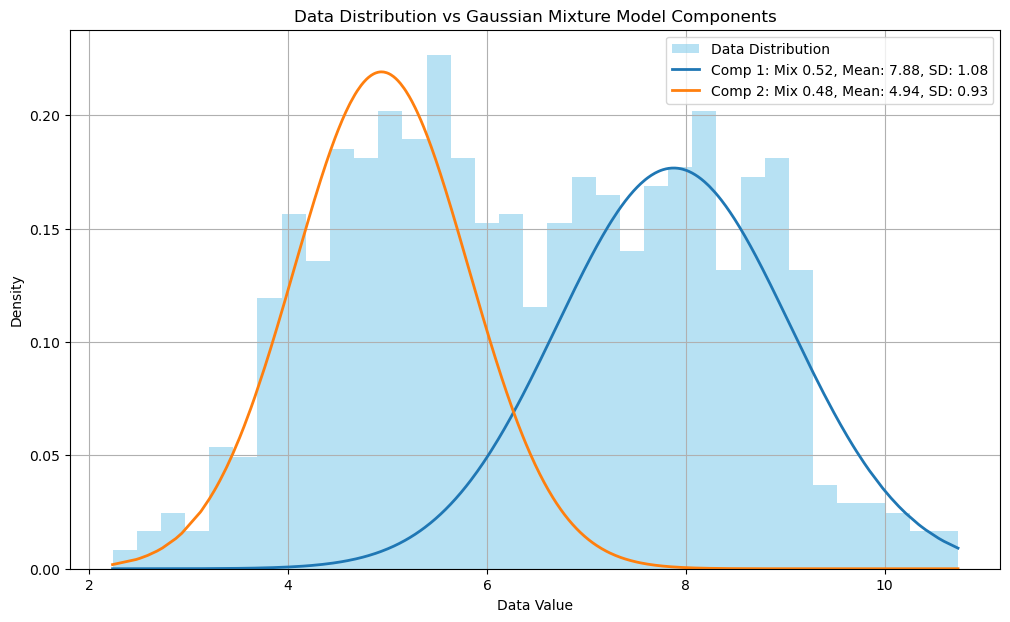

In [198]:
# Import necessary libraries
from scipy.stats import norm
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to initialize GMM parameters
def gmm_init(k, dataset):
    kmeans = KMeans(k, init='k-means++').fit(X=np.array(dataset).reshape(-1, 1))
    gmm_params = []
    i = 0

    while i < k:
        count = 0
        sum_x = 0
        sum_x_squared = 0
        j = 0

        while j < len(dataset):
            if kmeans.labels_[j] == i:
                count += 1
                sum_x += dataset[j]
                sum_x_squared += dataset[j] ** 2
            j += 1

        mixture_prop = count / len(dataset) if len(dataset) > 0 else 0
        mean = sum_x / count if count != 0 else 0
        variance = (sum_x_squared / count) - (mean ** 2) if count != 0 else 0
        gmm_params.append(Component(mixture_prop, mean, variance))
        
        i += 1

    return gmm_params

# Function to compute GMM parameters based on probabilities
def compute_gmm(k, dataset, probs):
    gmm_params = []
    j = 0

    while j < k:
        count = 0
        sum_x = 0
        sum_x_squared = 0
        i = 0

        while i < len(dataset):
            count += probs[i][j]
            sum_x += probs[i][j] * dataset[i]
            sum_x_squared += probs[i][j] * (dataset[i] ** 2)
            i += 1

        mixture_prop = count / len(dataset) if len(dataset) > 0 else 0
        mean = sum_x / count if count != 0 else 0
        variance = (sum_x_squared / count) - (mean ** 2) if count != 0 else 0
        gmm_params.append(Component(mixture_prop, mean, variance))

        j += 1

    return gmm_params

# Function to compute probabilities for each data point and component
def compute_probs(k, dataset, gmm_params):
    probs = []
    i = 0

    while i < len(dataset):
        x = dataset[i]
        p_x_given_c = []
        j = 0

        while j < k:
            comp = gmm_params[j]
            p = comp.mixture_prop * norm.pdf(x, comp.mean, comp.variance)
            p_x_given_c.append(p)
            j += 1

        p_x = sum(p_x_given_c)
        probs_x_i = [p / p_x for p in p_x_given_c] if p_x > 0 else [0] * k
        probs.append(probs_x_i)

        i += 1

    return probs

# Function to perform the Expectation-Maximization (EM) algorithm
def expectation_maximization(k, dataset, iterations):
    gmm_params = gmm_init(k, dataset)
    iteration = 0

    while iteration < iterations:
        # Expectation step: Compute probabilities
        probs = compute_probs(k, dataset, gmm_params)

        # Maximization step: Compute GMM parameters
        gmm_params = compute_gmm(k, dataset, probs)

        iteration += 1

    return probs, gmm_params

# Function to visualize the GMM components and data distribution
def visualize_gmm(gmm_components, data_points):
    sorted_data = np.array(data_points)
    sorted_data.sort()
    distinct_data_points = list(set(sorted_data))
    distinct_data_points.sort()

    plt.figure(figsize=(12, 7))
    plt.hist(sorted_data, bins=35, density=True, alpha=0.6, color='skyblue', label='Data Distribution')

    for index, component in enumerate(gmm_components):
        component_density = component.mixture_prop * norm.pdf(distinct_data_points, component.mean, component.variance)
        plt.plot(distinct_data_points, component_density, lw=2, label=f'Comp {index+1}: Mix {component.mixture_prop:.2f}, Mean: {component.mean:.2f}, SD: {np.sqrt(component.variance):.2f}')

    plt.title('Data Distribution vs Gaussian Mixture Model Components')
    plt.xlabel('Data Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate a dataset from a GMM
data = generate_gmm_dataset(example_gmm, 1000)

# Perform EM estimation of GMM parameters
probs, learned_gmm_params = expectation_maximization(len(example_gmm), data, 5)

# Visualize the GMM components and data distribution
visualize_gmm(learned_gmm_params, data)


Notes:

1. your code should work with any number of components, each with reasonable parameters.
2. your code should work for 1 to about 5 iterations of the EM algorithm. It may not work for iterations over 10 because the math we are doing may overflow and create `nans` - that's ok / don't worry about it.